### PROJECT DESCRIPTION

The data set contains information about the sepsis illness. Using exploratory data analysis (EDA), I seek to gain more insights into the data. I ask questions that will serve as guide to better understand the data. Also, I will create a hypothesis that will be tested. This will help to give more insight into the data.
<br />
<br />
As a Data Scientist, I will create a machine learning model that will effectively classify the sepsis illness using the provided dataset.

### HYPOTHESIS FORMULATION

### GUIDING QUESTIONS

### IMPORT PACKAGES

In [3]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
plt.style.use("fivethirtyeight")

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Import Pipeline, Scaler,Sampler, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Import Encoders
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder

# import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# import power bi into notebook to directly create visuals
from powerbiclient import QuickVisualize, get_dataset_config

# Import the DeviceCodeLoginAuthentication class to authenticate against Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication

# Initiate device authentication
#device_auth = DeviceCodeLoginAuthentication()

import os, pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', message='The default value of numeric_only in DataFrame.corr is deprecated')

<Figure size 1000x500 with 0 Axes>

### LOAD DATA

In [4]:
sepsis_train = pd.read_csv("Patients_Files_Train.csv")
sepsis_test = pd.read_csv("Patients_Files_Test.csv")

## EXPLORATORY DATA ANALYSIS

In [6]:
# check samples of train data

pd.options.display.max_columns = None
sepsis_train.sample(5, random_state=1)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
442,ICU200452,4,117,64,27,120,33.2,0.230,24,0,Negative
286,ICU200296,5,155,84,44,545,38.7,0.619,34,0,Negative
379,ICU200389,0,93,100,39,72,43.4,1.021,35,0,Negative
522,ICU200532,6,114,0,0,0,0.0,0.189,26,1,Negative
200,ICU200210,0,113,80,16,0,31.0,0.874,21,1,Negative


In [8]:
# Check basic info of train data

sepsis_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [10]:
# Check shape of train data

print(f"train dataframe shape: {sepsis_train.shape}")

train dataframe shape: (599, 11)


In [18]:
# Check for null values

sepsis_train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

There are no null values in the data

In [19]:
# Check for duplicated values

sepsis_train.duplicated().any()

False

There are no duplicated values in the data

### UNIVARAITE ANALYSIS

In [21]:
# Check the value counts of target feature (Sepssis)
sepsis_train["Sepssis"].value_counts()

Negative    391
Positive    208
Name: Sepssis, dtype: int64

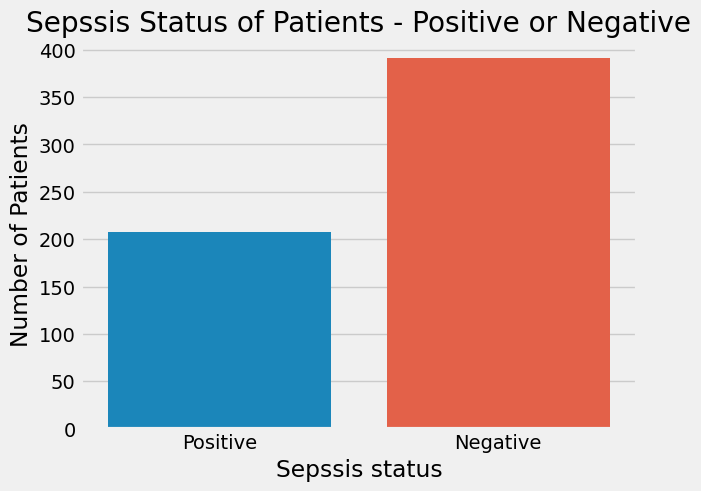

In [24]:
#Plot value counts on a graph
sns.countplot(x='Sepssis', data=sepsis_train)
plt.title("Sepssis Status of Patients - Positive or Negative")
plt.xlabel('Sepssis status')
plt.ylabel('Number of Patients')
plt.show()

From the above graph, 391 patients were recorded as being Sepssis Negative, whereas 280 were recorded as being Sepssis Positive.

In [26]:
# Check the value counts of patients having insurance coverage
sepsis_train["Insurance"].value_counts()

1    411
0    188
Name: Insurance, dtype: int64

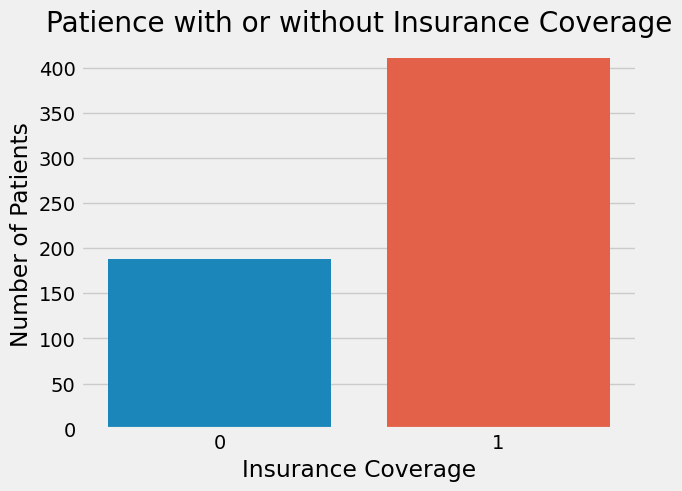

In [27]:
#Plot value counts on a graph
sns.countplot(x='Insurance', data=sepsis_train)
plt.title("Patience with or without Insurance Coverage")
plt.xlabel('Insurance Coverage')
plt.ylabel('Number of Patients')
plt.show()

From the graph, 411 patients had insurance coverages whereas 118 patients had no insurance coverage.

### BIVARIATE ANALYSIS

In [43]:
# Check the minimum age of Sepssis Positive and Sepssis Negative patients

average_age = sepsis_train.groupby("Sepssis")["Age"].mean()
average_age

Sepssis
Negative    31.478261
Positive    36.697115
Name: Age, dtype: float64

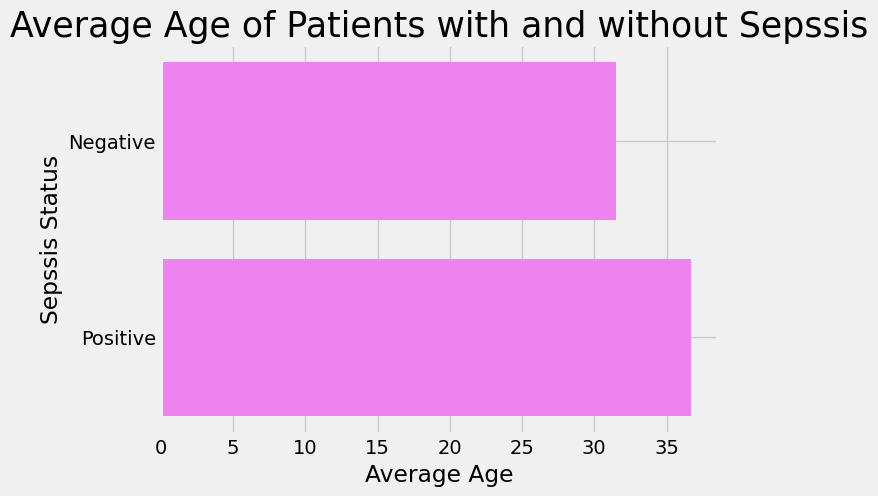

In [48]:
#Plot minimum age of patients on a graph
average_age = sepsis_train.groupby("Sepssis")["Age"].mean()

plt.barh(average_age.index, average_age.values, color="violet")
plt.title("Average Age of Patients with and without Sepssis", fontsize=25)
plt.xlabel("Average Age")
plt.ylabel("Sepssis Status")
plt.xticks()
plt.yticks()
plt.gca().invert_yaxis()
plt.show()

The Average age of Patients without Sepssis is 31 years and the average age of patients with Sepssis is 37 years.

In [51]:
# Check the minimum age of Sepssis negative and Sepssis positive patients

min_age = sepsis_train.groupby("Sepssis")["Age"].min()
min_age

Sepssis
Negative    21
Positive    21
Name: Age, dtype: int64

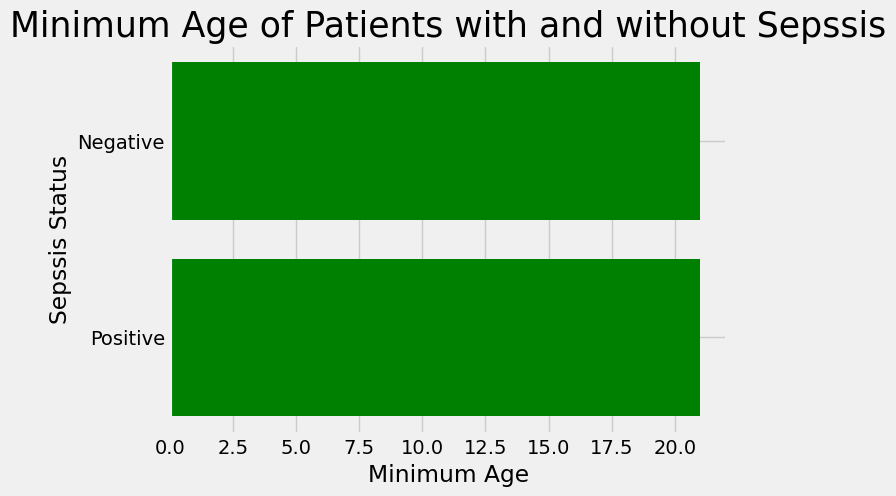

In [52]:
#Plot minimum age of patients on a graph
min_age = sepsis_train.groupby("Sepssis")["Age"].min()

plt.barh(min_age.index, min_age.values, color="green")
plt.title("Minimum Age of Patients with and without Sepssis", fontsize=25)
plt.xlabel("Minimum Age")
plt.ylabel("Sepssis Status")
plt.xticks()
plt.yticks()
plt.gca().invert_yaxis()
plt.show()

The minimum age of patients with and without Sepssis is 21 years.

In [53]:
# Check the minimum age of Sepssis negative and Sepssis positive patients

max_age = sepsis_train.groupby("Sepssis")["Age"].max()
max_age

Sepssis
Negative    81
Positive    67
Name: Age, dtype: int64

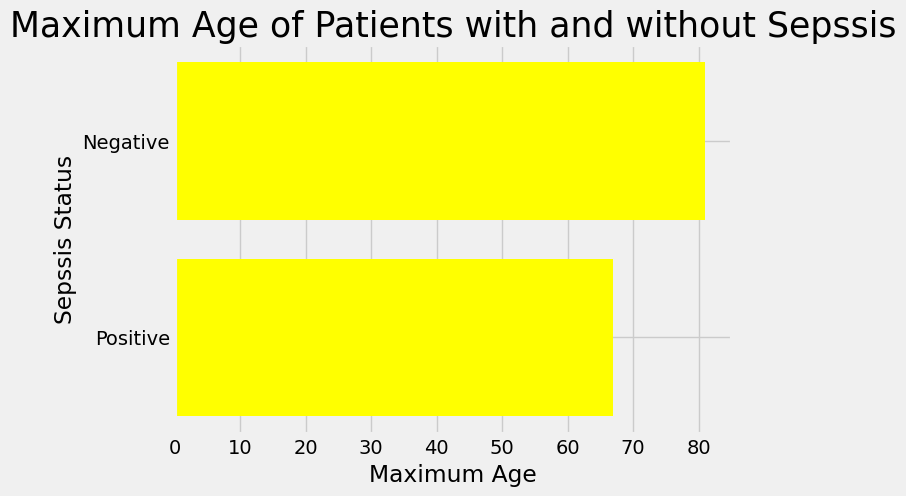

In [54]:
#Plot minimum age of patients on a graph
max_age = sepsis_train.groupby("Sepssis")["Age"].max()

plt.barh(max_age.index, max_age.values, color="yellow")
plt.title("Maximum Age of Patients with and without Sepssis", fontsize=25)
plt.xlabel("Maximum Age")
plt.ylabel("Sepssis Status")
plt.xticks()
plt.yticks()
plt.gca().invert_yaxis()
plt.show()

The Maximum Age of Patients with Sepssis is 67 years and the Maximum Age of patients without Sepssis is 81 years.